In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
from MAB import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Parameters and aliases for all algorithms

In [3]:
# Enter the parameters of each algorithms
mapping = {'RAG': GaussianRAMAB}
mapping_name = {'RAG': 'Gaussian'}

### Manual runs of algorithms

In [4]:
bandit = 'RAG'

# risk aversion level
alpha = 1.0

# parameters for the arms distribution
# (mu, sigma, alpha)
p = [[0.0, 1.0, alpha], [0.5, 2.0, alpha]]  
T = 500  # Horizon
N = 1  # Number of MC runs
step = 25  # If results are saved trajectories are stored for all rounds such that t%step=0

model = mapping[bandit](p, 'erm')

f = lambda t: np.log(2 * np.exp(1) * (t + np.exp(1)) * t ** 2 / 0.5) 
r, _ = model.MC_regret('erm_ucb', N, T, {'f': f}, step, 'erm')
# r, _ = model.MC_regret('RB_SDA', N, T, {}, step, 'erm')
res = pd.DataFrame([r]).T
res.columns = ['ra_ucb']
# res.columns = ['RB_SDA']

Computing 1 simulations: 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]


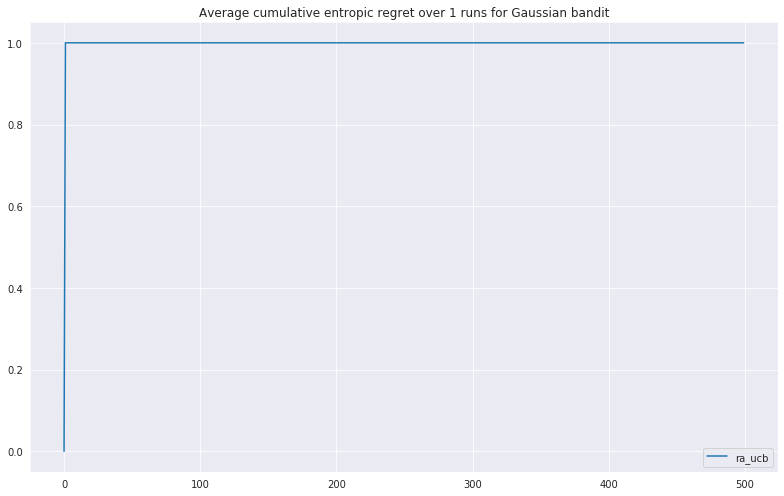

In [5]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)

    res.plot(ax=ax)
    
    ax.legend(loc='lower right')
    ax.set_title('Average cumulative entropic regret over {} runs for {:s} bandit'.format(N, mapping_name[bandit]))

    plt.tight_layout()
    plt.show()

### Parallelized runs of multiple algorithms on the same bandit

In [6]:
# Enter the parameters of each algorithms
param = {
    'RB_SDA': {}, 
    'erm_ucb': {'f': lambda t: np.log(2 * np.exp(1) * (t + np.exp(1)) * t ** 2 / 0.5)}
}

bandit = 'RAG'

# risk aversion level
alpha = 1.0

# parameters for the arms distribution
# (mu, sigma, alpha)
p = [[0.0, 1.0, alpha], [0.5, 2.0, alpha]]  
T = 500  # Horizon
N = 10  # Number of MC runs
step = 25  # If results are saved trajectories are stored for all rounds such that t%step=0

algs = ['erm_ucb', 'RB_SDA']  # Select some Algorithms (check param file for availability)

res, traj = multiprocess_MC(
    (bandit, p, T, N, algs, param, step, 'erm'),
    plot=False, 
    caption=None,
)

# res, traj = MC_xp(
#     (bandit, p, T, N, algs, param, step, 'erm'),
#     plot=False, 
#     caption=None,
# )

Running on 4 cores
Execution time: 40.66937279701233 seconds


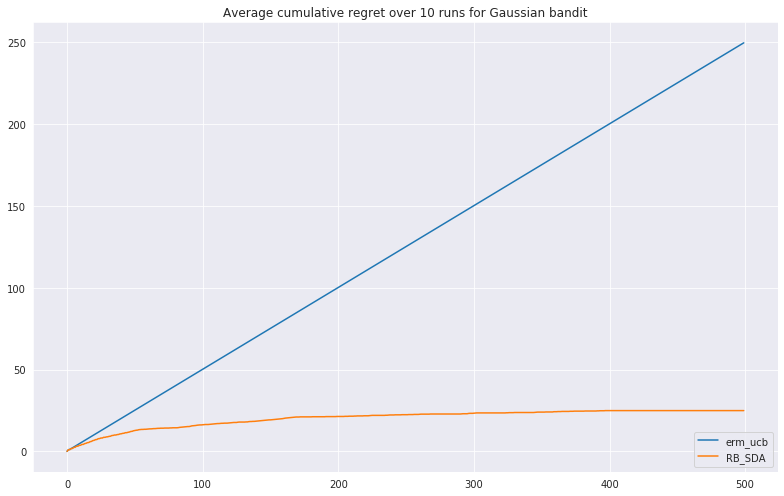

In [7]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)

    res.plot(ax=ax)
    ax.legend(loc='lower right')
    ax.set_title('Average cumulative regret over {} runs for {:s} bandit'.format(N, mapping_name[bandit]))

    plt.tight_layout()
    plt.show()